# 1. Loading the Libraries

In [399]:
import pandas as pd
import numpy as np
from pandas import Series
import os
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from pandas_ml import ConfusionMatrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, auc, roc_auc_score
%matplotlib inline

# 2. Loading the Dataset

In [400]:
churn_data = pd.read_csv('marketing-data.csv')

# 3. Data Preprocessing

## a. View Data Attributes

In [401]:
churn_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_success
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [402]:
churn_data.shape

(45211, 17)

In [403]:
churn_data.is_success.value_counts()

no     39922
yes     5289
Name: is_success, dtype: int64

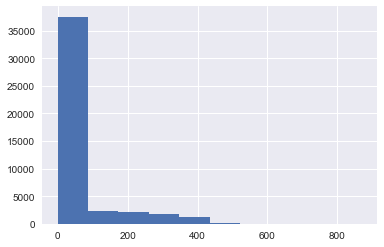

In [404]:
churn_data.pdays.hist()

In [405]:
bins = [-1, 0, 150, 300, 450, 600]

In [1]:
group_names = ['No Contact', '0 to 150', '151 to 300', '301 to 450', '451 to 600']

In [407]:
df['categories'] = pd.cut(churn_data['pdays'], bins, labels=group_names)

In [408]:
churn_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_success,categories
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,NaN
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,NaN
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,NaN
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,NaN


In [409]:
churn_data.categories.value_counts()

151 to 300    3441
0 to 150      2346
301 to 450    2299
451 to 600     119
No Contact       0
Name: categories, dtype: int64

In [410]:
churn_data['categories'] = churn_data['categories'].fillna('No Contact')

In [411]:
churn_data['categories'] = churn_data.categories.astype('object')

## b. Check Missing Values

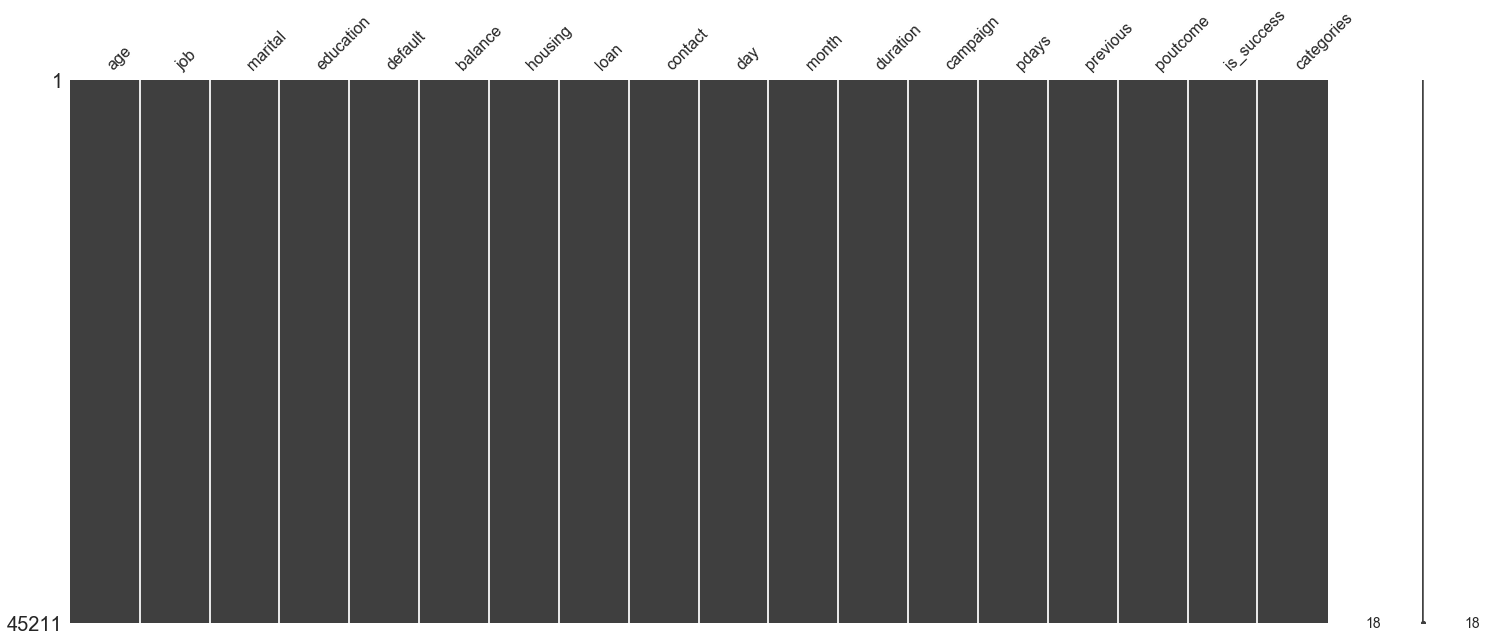

In [412]:
msno.matrix(churn_data)

## c. Split the Numeric and Object data types

In [413]:
churn_data_numerics = churn_data.select_dtypes(exclude=[object])

In [414]:
churn_data_objects = churn_data.select_dtypes(include=[object])

## d. Check the correlation for numeric variables

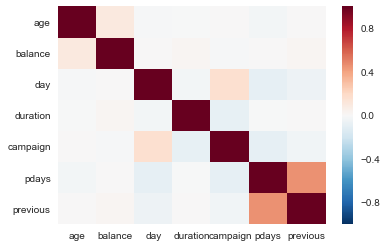

In [415]:
corr = churn_data_numerics.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## e. Label Encoding for Object variables

In [416]:
from sklearn.preprocessing import LabelEncoder

In [417]:
churn_data_objects = churn_data_objects.apply(LabelEncoder().fit_transform)

## f. Join Numeric and Object variables

In [418]:
churn_new = pd.concat([churn_data_numerics, churn_data_objects], axis=1)

In [419]:
churn_new.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,is_success,categories
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0,4
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0,4
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0,4
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0,4
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0,4


In [420]:
churn_new = churn_new.drop(['duration', 'pdays'], axis=1)

In [421]:
y = churn_new.is_success

In [422]:
X = churn_new.ix[:, churn_new.columns != 'is_success']

In [423]:
X_colnames = X.columns.tolist()

In [424]:
churn_new.categories.dtype

dtype('int64')

## g. Scale the variables

In [425]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [426]:
X = pd.DataFrame(X, columns=X_colnames)

## h. Principal Component Analysis

In [427]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=15)
pca_2.fit(X)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[  16.25   27.4    37.35   45.35   52.72   59.5    65.71   71.83   77.49
   82.98   88.13   92.18   95.79   99.22  100.  ]


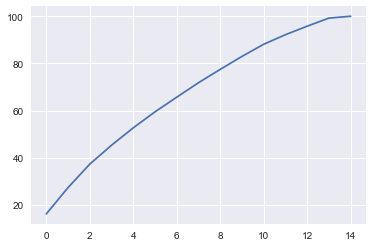

In [428]:
var1=np.cumsum(np.round(pca_2.explained_variance_ratio_, decimals=4)*100)
print var1
plt.plot(var1)

In [429]:
pca = PCA(n_components=11)
pca.fit(X)
X_reduced = pca.transform(X)

In [430]:
X_reduced = pd.DataFrame(X_reduced)

## i. Split the dataset into training and test

In [431]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=1)

In [432]:
from imblearn.over_sampling import SMOTE

In [433]:
sm = SMOTE(random_state=12, ratio = 1.0)

In [434]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# 3. Modeling

## a. Logistic Regression

In [435]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

clf = LogisticRegression()
clf.fit(X_train_res, y_train_res)
y_train_pred = clf.predict(X_train_res)

In [436]:
cm_logistic_train = ConfusionMatrix(y_train_res, y_train_pred)

In [437]:
y_test_pred = clf.predict(X_test)

In [438]:
cm_logistic_test = ConfusionMatrix(y_test, y_test_pred)

In [439]:
auc_logistic_train = roc_auc_score(y_train_res, y_train_pred)
auc_logistic_test = roc_auc_score(y_test, y_test_pred)

## b. Decision Tree

In [440]:
from sklearn import tree

In [441]:
dt = tree.DecisionTreeClassifier()

In [442]:
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [443]:
yhat_dt_train = dt.predict(X_train_res)

In [444]:
cm_dt_train = ConfusionMatrix(y_train_res, yhat_dt_train)

In [445]:
yhat_dt_test = dt.predict(X_test)

In [446]:
cm_dt_test = ConfusionMatrix(y_test, yhat_dt_test)

In [461]:
auc_dt_train = roc_auc_score(y_train_res, yhat_dt_train)
auc_dt_test = roc_auc_score(y_test, yhat_dt_test)

## c. SVC

In [447]:
from sklearn.svm import SVC

In [448]:
svc = SVC()

In [449]:
svc.fit(X_train_res, y_train_res)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [450]:
yhat_svc_train = svc.predict(X_train_res)

In [451]:
cm_svc_train = ConfusionMatrix(y_train_res, yhat_svc_train)

In [452]:
yhat_svc_test = svc.predict(X_test)

In [453]:
cm_svc_test = ConfusionMatrix(y_test, yhat_svc_test)

In [462]:
auc_svc_train = roc_auc_score(y_train_res, yhat_svc_train)
auc_svc_test = roc_auc_score(y_test, yhat_svc_test)

## d. Random Forest

In [454]:
from sklearn.ensemble import RandomForestClassifier

In [455]:
rf = RandomForestClassifier()

In [456]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [457]:
yhat_rf_train = rf.predict(X_train_res)

In [458]:
cm_rf_train = ConfusionMatrix(y_train_res, yhat_rf_train)

In [459]:
yhat_rf_test = rf.predict(X_test)

In [460]:
cm_rf_test = ConfusionMatrix(y_test, yhat_rf_test)

In [466]:
auc_rf_train = roc_auc_score(y_train_res, yhat_rf_train)
auc_rf_test = roc_auc_score(y_test, yhat_rf_test)

# 3. Model Comparison and selection of the best

In [495]:
TPR = pd.Series([cm_logistic_train.TPR, cm_logistic_test.TPR, cm_dt_train.TPR, cm_dt_test.TPR, cm_svc_train.TPR, cm_svc_test.TPR, cm_rf_train.TPR, cm_rf_test.TPR])
TNR = pd.Series([cm_logistic_train.TNR, cm_logistic_test.TNR, cm_dt_train.TNR, cm_dt_test.TNR, cm_svc_train.TNR, cm_svc_test.TNR, cm_rf_train.TNR, cm_rf_test.TNR])
F1 = pd.Series([cm_logistic_train.F1_score, cm_logistic_test.F1_score, cm_dt_train.F1_score, cm_dt_test.F1_score, cm_svc_train.F1_score, cm_svc_test.F1_score, cm_rf_train.F1_score, cm_rf_test.F1_score])
AUC = pd.Series([auc_logistic_train, auc_logistic_test, auc_dt_train, auc_dt_test, auc_svc_train, auc_svc_test, auc_rf_train, auc_rf_test])

index = pd.Series(['Logistic_Train', 'Logistic_Test', 'DT_Train', 'DT_Test', 'SVC_Train', 'SVC_Test', 'RF_Train', 'RF_Test'])
results = pd.concat([index, TPR,TNR, F1, AUC], axis=1)
results.columns = ['Model', 'Sensitivity', 'Specificity', 'F1', 'AUC']
results

,Model,Sensitivity,Specificity,F1,AUC
0,Logistic_Train,0.678686,0.635376,0.664301,0.657031
1,Logistic_Test,0.384615,0.611210,0.057613,0.668239
2,DT_Train,1.000000,1.000000,1.000000,1.000000
3,DT_Test,0.340659,0.776508,0.082888,0.630730
4,SVC_Train,0.718921,0.751136,0.730691,0.735029
5,SVC_Test,0.285714,0.700464,0.054393,0.684337
6,RF_Train,0.994553,0.997494,0.996017,0.996023
7,RF_Test,0.109890,0.865048,0.041754,0.630730
